# Programming Task: 

## Language Recognition Using Distributed High Dimensional Representations
---

**Author Details -** \
&emsp;&emsp;Name:&emsp;&emsp;**Sharadananda Mondal**\
&emsp;&emsp;Email:&emsp;&emsp; sharadananda.mondal@gmail.com\
&emsp;&emsp;Mobile:&emsp;&ensp;+91-8709331235

### Objective:

Classify the language of an input text. The language recognition will be done for 21 European languages. 
The list of languages being - Bulgarian, Czech, Danish, German, Greek, English, Estonian, Finnish, French, Hungarian, Italian, Latvian, Lithuanian, Dutch, Polish, Portuguese, Romanian, Slovak, Slovene, Spanish, Swedish. 
The training and testing data is based on the Wortschatz Corpora: https://wortschatz.uni-leipzig.de/en/download

### Approach:

- Smaller size subsets of original data sets were used for faster processing. In fact selected randomly 500 rows from each
  language corpora and combined together to form train data set for the classification data model.
- Data preprocessing was necessary. The data procured from Leipzig corpora had some noise in it. Used Notepad++ for data
  cleaning. Removed symbols, punctuation marks, digits from the data. Later checked for punctuation marks using Jupyter
  notebook
- A 70-30 split was done for model training and testing purpose.
- Using tri-grams were memory intensive especially when used with Count Vectorizier, a sklearn library. So continued with 1-gram for the time being.
- Ridge Classification was used to train the model, an implementation from sklearn library
- Test data were taken from euparl repository
- Confusion matrix, accuracy and F1-scores were calculated and plotted
- The validation results were encouraging. The accuracy score from test data achieved being 0.95.
- The test data from europarl release v7 repository was subsetted to 100 rows for each language input text.

### Model Building 

**Step-1: Import the necessary Libraries**

In [1]:
import re
import string
import itertools
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics

**Step-2: Load data**

Data was preprocessed. It was obtained by combining news data in selected languages from the Leipzig Corpora repository. 

In [2]:
data = pd.read_csv("../input/leipzig21_500_sub.csv")
data.head(5)

,Text,Language
0,Пищна церемония и мач с непредсказуем изход з...,Bulgarian
1,Детето не искало да яде така че трябвало да го...,Bulgarian
2,Защото юрдеците окрякаха Вселената когато беше...,Bulgarian
3,Лидерът на БСП и вицепремиер Корнелия Нинова д...,Bulgarian
4,Около двайсетина драгановчани настояваха да ра...,Bulgarian


Outline of data. It shows no of rows and memory usage.

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      10500 non-null  object
 1   Language  10500 non-null  object
dtypes: object(2)
memory usage: 164.2+ KB
None


Rows by language type.

In [4]:
data['Language'].value_counts()

Language
Bulgarian     500
Greek         500
Swedish       500
Spanish       500
Slovenian     500
Slovak        500
Romanian      500
Portuguese    500
Polish        500
English       500
Dutch         500
Czech         500
Lithuanian    500
Lativian      500
Italian       500
French        500
Finnish       500
Estonian      500
German        500
Danish        500
Hungarian     500
Name: count, dtype: int64

**Step-3: Separating Label from the data** 

Labels are the predictor variables, dependent variable. While the other features are independent variables.

In [5]:
X = data["Text"]
y = data["Language"]

Label Encoding

In [6]:
le = LabelEncoder()
y = le.fit_transform(y)

**Step-4: Text Preprocessing**

In [7]:
# creating a list for appending the preprocessed text
data_list = []
# iterating through all the text
for text in X:
       # removing the symbols and numbers
        text = re.sub(r'[!@#$(),n"%^*?:;~`0-9®©$]', ' ', text)
        text = re.sub(r'[[]]', ' ', text)
        # converting the text to lower case
        text = text.lower()
        # removing punctuation
        text = ''.join([j for j in text if j not in string.punctuation])
        # appending to data_list
        data_list.append(text)

C:\Users\shara\AppData\Local\Temp\ipykernel_7752\1572569825.py:7: FutureWarning: Possible nested set at position 1
  text = re.sub(r'[[]]', ' ', text)


**Bag of Words**

Output feature and input feature should be of the numerical form. So we are converting text into numerical form by creating a Bag of Words model using CountVectorizer.

In [8]:
cv = CountVectorizer(ngram_range=(1,1), analyzer="word", min_df=1, max_df=1.0) # unigram (1,1) for word analyzer
X = cv.fit_transform(data_list).toarray()
X.shape #(10500, 64592)

(10500, 64952)

### Visualization: WordCloud

In [9]:
from wordcloud import WordCloud

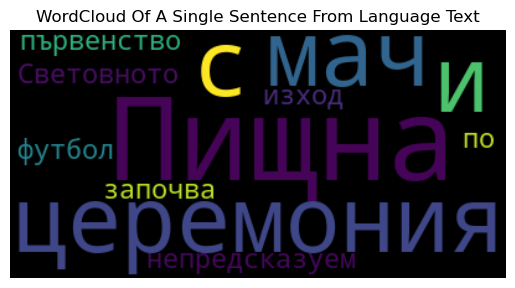

In [10]:
# Start with one review:
text = data.Text[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud Of A Single Sentence From Language Text")
plt.show()

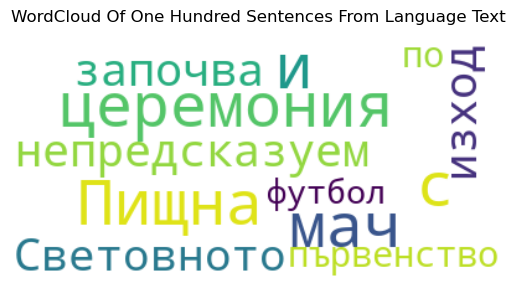

In [11]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", random_state=100).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud Of One Hundred Sentences From Language Text")
plt.show()

In [12]:
text = " ".join(review for review in data.Text)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 1125189 words in the combination of all review.


In [13]:
from wordcloud import STOPWORDS

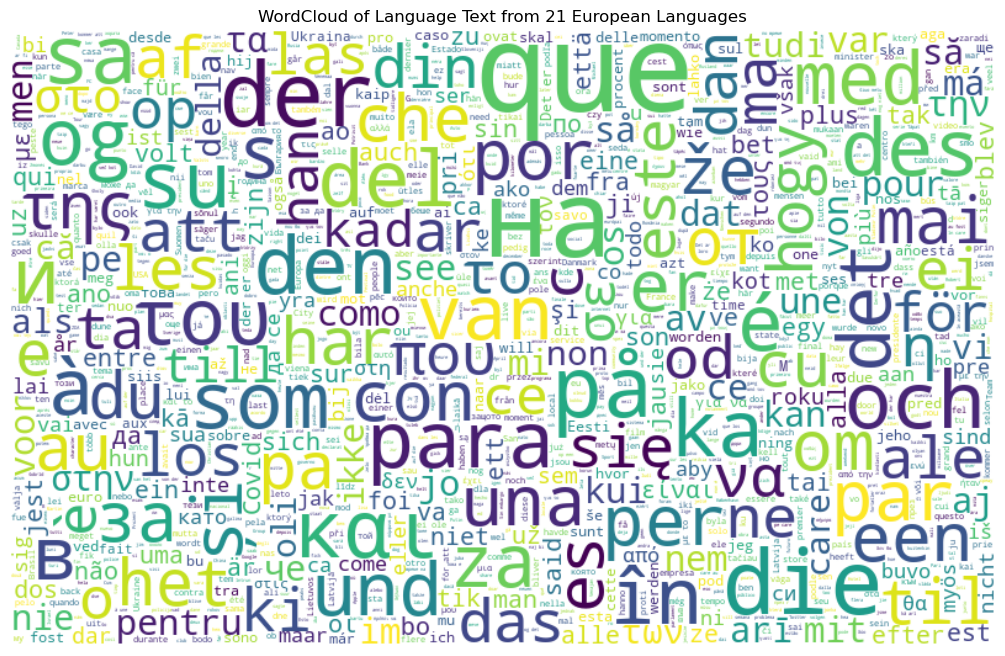

In [14]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["la", "de", "v", "na", "le", "je", "o", "en", "z", "y", "al", "ha", "un", "si", "ja", "lo", "az", "po","nu",
                  "c", "e", "w", "il", "ir", "da", "se", "te", "el", "em", "di", "um", "et"]),

# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=stopwords, width= 800, height = 500, random_state= 42, 
                      max_font_size= 100, background_color="white", max_words=5000).generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize = (15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("WordCloud of Language Text from 21 European Languages")
plt.axis("off")
#plt.axes(linewidth=1.0)
plt.show()

In [15]:
# Save the image in the img folder:
wordcloud.to_file("../img/five_thousand_sentences.png")

**Step-5: Train Test Data Splitting**

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=0)

**Step-6: Model Training and Prediction**

In [17]:
model = RidgeClassifier()
model.fit(x_train, y_train)

RidgeClassifier()

**Prediction**

In [18]:
y_pred = model.predict(x_test)

**Step-7: Model Evaluation**

Model Accuracy

In [19]:
lang_labels = le.inverse_transform(np.unique(y_test))

In [20]:
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
clf_report = classification_report(y_test, y_pred, target_names=lang_labels)
print("Accuracy is :",ac)

Accuracy is : 0.9482539682539682


Complete classification report including **f1-scores** for each language input

In [21]:
print(clf_report)

              precision    recall  f1-score   support

   Bulgarian       1.00      0.99      1.00       153
       Czech       0.92      0.90      0.91       129
      Danish       0.95      0.95      0.95       145
       Dutch       0.93      0.96      0.94       147
     English       0.96      0.97      0.97       159
    Estonian       0.94      0.91      0.93       150
     Finnish       0.95      0.93      0.94       155
      French       0.96      0.97      0.96       137
      German       0.92      0.97      0.95       151
       Greek       1.00      0.98      0.99       150
   Hungarian       0.99      0.94      0.96       145
     Italian       0.92      0.97      0.95       150
    Lativian       0.97      0.95      0.96       164
  Lithuanian       0.95      0.94      0.94       147
      Polish       0.90      0.94      0.92       150
  Portuguese       0.93      0.93      0.93       153
    Romanian       0.98      0.93      0.95       170
      Slovak       0.91    

Confusion Matrix

<Axes: title={'center': 'Confusion Matrix: Language Detection from Text Input'}, xlabel='Predicted', ylabel='Actual'>

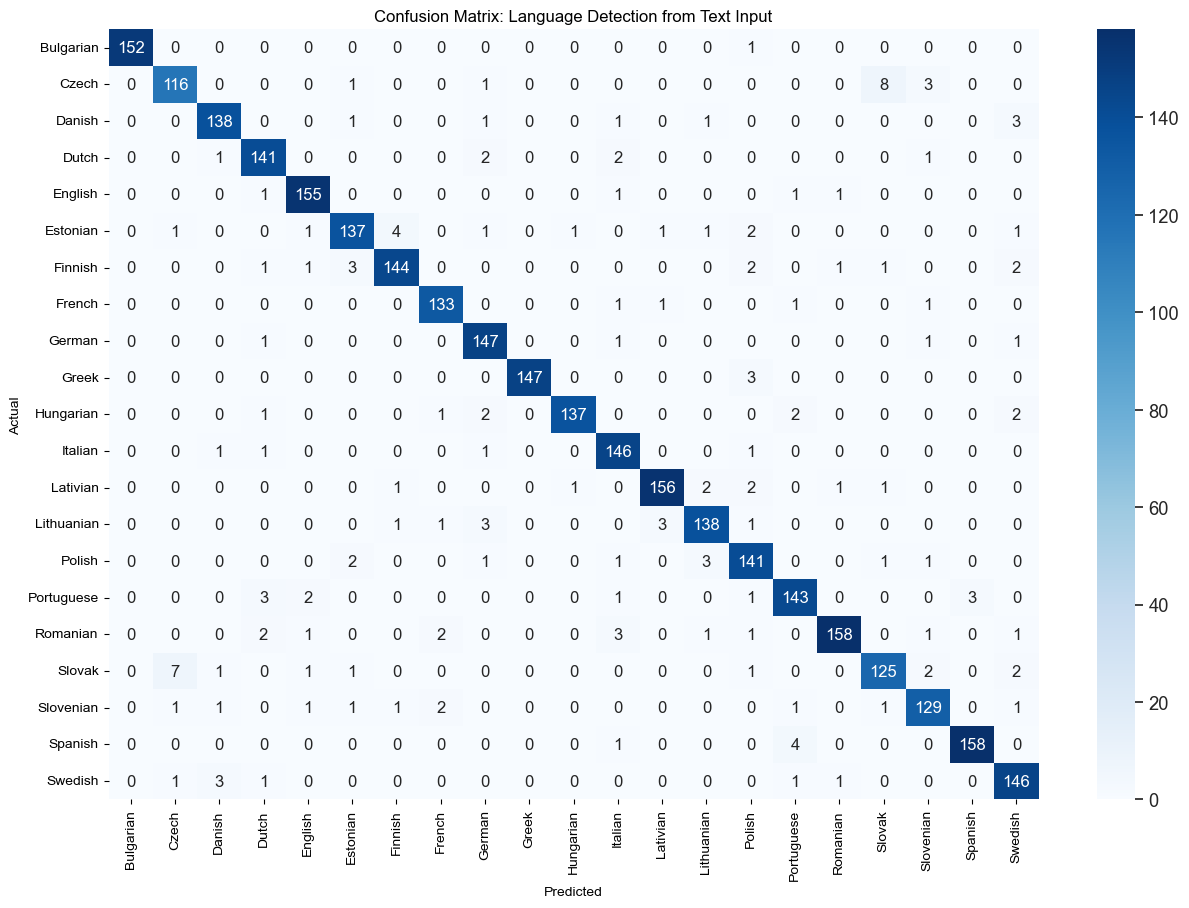

In [22]:
df_cm = pd.DataFrame(cm, columns=lang_labels, index = lang_labels)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (15,10))
plt.title("Confusion Matrix: Language Detection from Text Input")
sns.set(font_scale=1.2)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 12}, fmt="d")# font size

**Step-8: Model Validation**

#### Test data from europarl release v7 was subsetted and used as an input text for model testing

In [23]:
test_data = pd.read_csv("../input/eurprl21_100_sub.csv")
test_data.head(5)

,Text,Language
0,Онова което се случва в интернет премина всичк...,Bulgarian
1,Повече не можем да се разглеждаме и възприемам...,Bulgarian
2,Конвенция № преразглежда няколко постари стан...,Bulgarian
3,Да се надяваме че ще бъде направена крачка напред,Bulgarian
4,Пример за това е Южния коридор,Bulgarian


In [24]:
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      2100 non-null   object
 1   Language  2100 non-null   object
dtypes: object(2)
memory usage: 32.9+ KB
None


In [25]:
test_data['Language'].value_counts()

Language
Bulgarian     100
Greek         100
Swedish       100
Spanish       100
Slovanian     100
Slovakian     100
Romanian      100
Portuguese    100
Polish        100
English       100
Dutch         100
Czech         100
Lithuanian    100
Latvian       100
Italian       100
French        100
Finnish       100
Estonian      100
German        100
Danish        100
Hungarian     100
Name: count, dtype: int64

**Separating Labels i.e. predictor variables from independent variables**

In [26]:
Xt = test_data["Text"]
yt = test_data["Language"]

In [27]:
le = LabelEncoder()
yt = le.fit_transform(yt)

In [28]:
# creating a list for appending the preprocessed text
test_data_list = []
# iterating through all the text
for text_ in Xt:
       # removing the symbols and numbers
        text_ = re.sub(r'[!@#$(),n"%^*?:;~`0-9®©$]', ' ', text_)
        text_ = re.sub(r'[[]]', ' ', text_)
        # converting the text to lower case
        text_ = text_.lower()
        # removing punctuation
        text_ = ''.join([j for j in text_ if j not in string.punctuation])
        # appending to data_list
        test_data_list.append(text_)

**Note:** Same vectorizer was used for test data also which was previously used for train data as above.

In [29]:
Xt = cv.transform(test_data_list).toarray()
Xt.shape

(2100, 64952)

Model Prediction from test data

In [30]:
yt_pred = model.predict(Xt)

In [31]:
test_lang_labels = le.inverse_transform(np.unique(yt))

Model accuracy calculation

In [32]:
ac_ = accuracy_score(yt, yt_pred)
cm_ = confusion_matrix(yt, yt_pred)
clf_report_ = classification_report(yt, yt_pred, target_names=test_lang_labels)
print("Accuracy is :",ac_)

Accuracy is : 0.95


f1-score and complete classification report

In [33]:
print(clf_report_)

              precision    recall  f1-score   support

   Bulgarian       1.00      0.99      0.99       100
       Czech       0.93      0.88      0.90       100
      Danish       0.95      0.96      0.96       100
       Dutch       0.95      0.97      0.96       100
     English       0.94      0.96      0.95       100
    Estonian       0.97      0.95      0.96       100
     Finnish       0.95      0.93      0.94       100
      French       1.00      0.95      0.97       100
      German       0.94      0.99      0.97       100
       Greek       1.00      0.98      0.99       100
   Hungarian       0.99      0.94      0.96       100
     Italian       0.96      0.97      0.97       100
     Latvian       0.99      0.96      0.97       100
  Lithuanian       0.96      0.94      0.95       100
      Polish       0.75      0.97      0.84       100
  Portuguese       0.97      0.96      0.96       100
    Romanian       0.97      0.95      0.96       100
   Slovakian       0.91    

**Confusion Matrix: Test Data**

<Axes: title={'center': 'Confusion Matrix: Language Detection from Test Text Input'}, xlabel='Predicted', ylabel='Actual'>

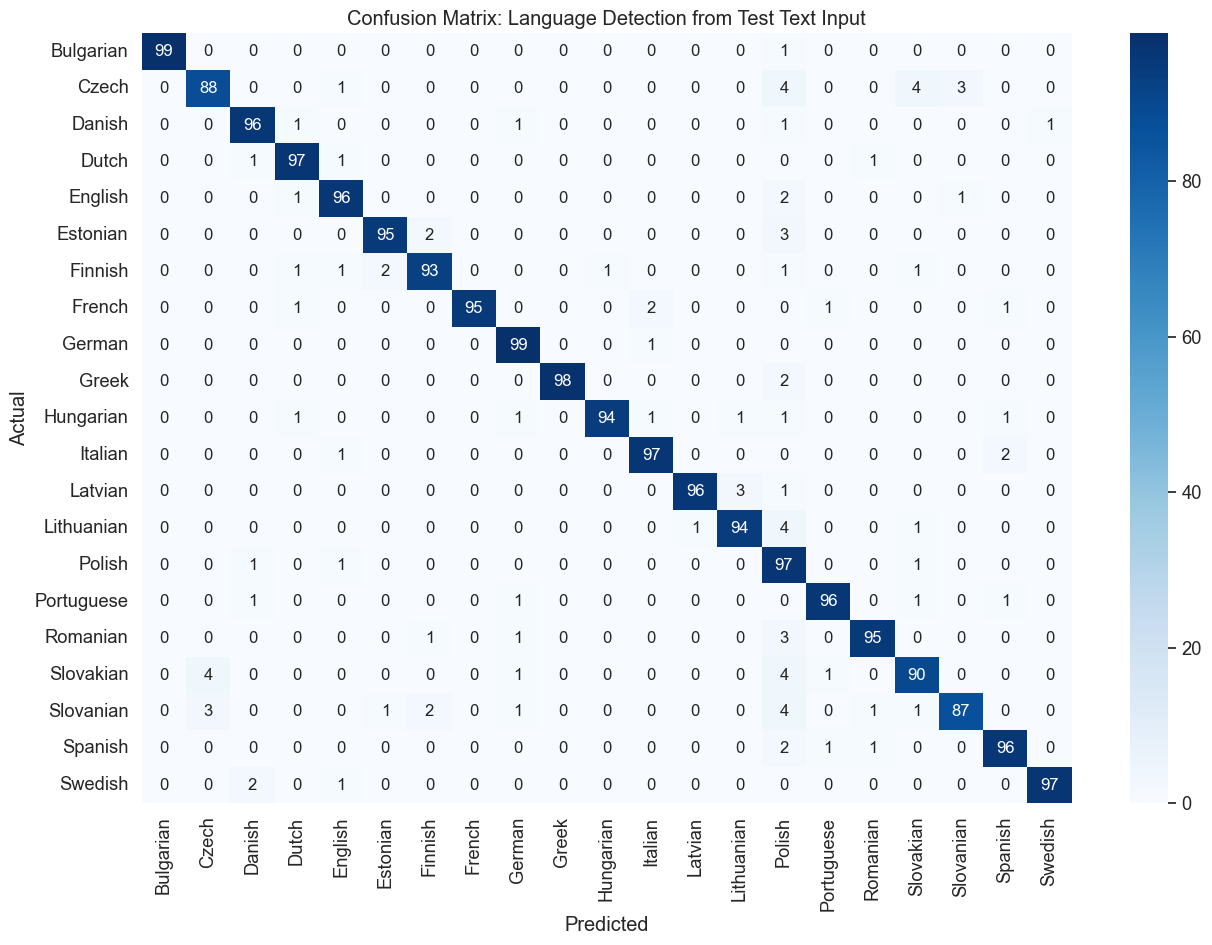

In [34]:
df_cm_ = pd.DataFrame(cm_, columns=test_lang_labels, index = test_lang_labels)
df_cm_.index.name = 'Actual'
df_cm_.columns.name = 'Predicted'
plt.figure(figsize = (15,10))
plt.title("Confusion Matrix: Language Detection from Test Text Input")
sns.set(font_scale=1.2)#for label size
sns.heatmap(df_cm_, cmap="Blues", annot=True, annot_kws={"size": 12}, fmt="d")# font size

## Model Validation By directly passing the Language Input Text to the Function

**Function**

In [35]:
def predict(text):
     x = cv.transform([text]).toarray() # converting text to bag of words model (Vector)
     lang = model.predict(x) # predicting the language
     lang = le.inverse_transform(lang) # finding the language corresponding the the predicted value
     print("The langauge is in",lang[0]) # printing the language

Check the model using the **predict** function 

In [36]:
predict("представители на американското разузнаване потвърждават че използват информацията като оръжие дори когато началото си от")

The langauge is in Bulgarian


In [37]:
predict("komandų žaidėjai rungtynes pradėjo be didesnės žvalgybos")

The langauge is in Lithuanian


In [38]:
predict("Gegend im Grunde unbewohnbar gemacht. Aber davon haben sich viele Mutige in den vergangenen Jahren  Premiere war 2020")

The langauge is in German


In [39]:
predict("Vincentius Limburg om dit bij de bevoegde minister aanhangig te maken en hierover een parlementaire vraag te stellen")

The langauge is in Dutch


In [40]:
predict("Adriana Lima och filmproducenten Andre Lemmers på filmpremiären av ”Elvis” i Cannes.")

The langauge is in Swedish


In [41]:
predict("Français de  ans a créé une société dédition de jeux à Luxembourg pour lancer Pénaltir un jeu de cartes mais surtout de football")

The langauge is in French


In [42]:
predict("Arvoisa puhemies käytän työjärjestyspuheenvuoron")

The langauge is in Polish


# Data Pre-Processing Step: 
## Read & Combine data to form a single csv file for building the classification model

In [43]:
data_files = ['bul_news_2022_30K_sentences', 'ces_news_2022_30K_sentences','dan_news_2022_30K_sentences', 
              'deu_news_2023_30K_sentences', 'est_news_2022_30K_sentences','fin_news_2022_30K_sentences',
              'fra_news_2023_30K_sentences','ita_news_2023_30K_sentences','lav_news_2020_30K_sentences',
              'lit_news_2020_30K_sentences','nld_news_2022_30K_sentences','ell_news_2022_30K_sentences',
              'eng_news_2023_30K_sentences','pol_news_2023_30K_sentences','por_news_2022_30K_sentences',
              'ron_news_2022_30K_sentences','slk_news_2020_30K_sentences','slv_news_2020_30K_sentences',
              'spa_news_2023_30K_sentences','swe_news_2022_30K_sentences','hun_news_2023_30K_sentences']
languages = ['bul', 'ces','dan','deu','est','fin','fra','ita','lav','lit', 'nld', 'ell','eng','pol','por','ron','slk','slv','spa','swe','hun']
df_dic = {}

In [44]:
for filename, language in zip(data_files, languages):
    df_name = language + '_df'
    file = "../input/data/{}.csv".format(filename)
    df_dic[df_name] = pd.read_csv(file)

In [45]:
df = pd.concat(df_dic.values(), ignore_index=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Text      630000 non-null  object
 1   Language  630000 non-null  object
dtypes: object(2)
memory usage: 9.6+ MB
None


In [46]:
df['Language'].value_counts()

Language
Bulgarian     30000
Greek         30000
Swedish       30000
Spanish       30000
Slovenian     30000
Slovak        30000
Romanian      30000
Portuguese    30000
Polish        30000
English       30000
Dutch         30000
Czech         30000
Lithuanian    30000
Lativian      30000
Italian       30000
French        30000
Finnish       30000
Estonian      30000
German        30000
Danish        30000
Hungarian     30000
Name: count, dtype: int64

## Creating a subset of data by selecting a few rows randomly

A train data subset is created consisting of 500 random texts sampled from each languages and stored in data frames separately.

In [47]:
dfsub_dic = {}
for name, dat in df_dic.items():
    dfsub_name = name + '_subdf'
    dfsub_dic[dfsub_name] = dat.sample(n=500, random_state=3).reset_index(drop=True)

In [48]:
subdf = pd.concat(dfsub_dic.values(), ignore_index=True)
print(subdf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      10500 non-null  object
 1   Language  10500 non-null  object
dtypes: object(2)
memory usage: 164.2+ KB
None


In [49]:
subdf['Language'].value_counts()

Language
Bulgarian     500
Greek         500
Swedish       500
Spanish       500
Slovenian     500
Slovak        500
Romanian      500
Portuguese    500
Polish        500
English       500
Dutch         500
Czech         500
Lithuanian    500
Lativian      500
Italian       500
French        500
Finnish       500
Estonian      500
German        500
Danish        500
Hungarian     500
Name: count, dtype: int64

The subsetted data was then stored locally for easy retrieval.

In [50]:
subdf.to_csv("../input/leipzig21_500_sub.csv", index=False)

In [51]:
df_ = pd.read_csv("../input/leipzig21_500_sub.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Text      630000 non-null  object
 1   Language  630000 non-null  object
dtypes: object(2)
memory usage: 9.6+ MB
None


In [52]:
df_.head()

,Text,Language
0,Пищна церемония и мач с непредсказуем изход з...,Bulgarian
1,Детето не искало да яде така че трябвало да го...,Bulgarian
2,Защото юрдеците окрякаха Вселената когато беше...,Bulgarian
3,Лидерът на БСП и вицепремиер Корнелия Нинова д...,Bulgarian
4,Около двайсетина драгановчани настояваха да ра...,Bulgarian


## Test Data is obtained from Europarl Release v7

Data files were obtained from the europarl repositiory accessible via https://www.statmt.org/europarl/

In [53]:
test_data_files = ['bul_eurprl', 'ces_eurprl','dan_eurprl', 'deu_eurprl', 'est_eurprl','fin_eurprl',
              'fra_eurprl','ita_eurprl','lav_eurprl','lit_eurprl','nld_eurprl','ell_eurprl', 'eng_eurprl','pol_eurprl','por_eurprl',
              'ron_eurprl','slk_eurprl','slv_eurprl','spa_eurprl','swe_eurprl','hun_eurprl']
test_langs = ['bul', 'ces','dan','deu','est','fin','fra','ita','lav','lit', 'nld', 'ell','eng','pol','por','ron','slk','slv','spa','swe','hun']
test_df_dic = {}

The test data files are stored in respective data frames, with filename as key, which are then passed onto a dictionary for storage. 

In [54]:
for filename, language in zip(test_data_files, test_langs):
    test_df_name = language + '_df'
    file = "../input/euro-parl-test-data/{}.csv".format(filename)
    test_df_dic[test_df_name] = pd.read_csv(file)

all the data frames are combined to form a single test data file

In [55]:
test_df = pd.concat(test_df_dic.values(), ignore_index=True)
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Text      630000 non-null  object
 1   Language  630000 non-null  object
dtypes: object(2)
memory usage: 9.6+ MB
None


In [56]:
test_df['Language'].value_counts()

Language
Bulgarian     30000
Greek         30000
Swedish       30000
Spanish       30000
Slovanian     30000
Slovakian     30000
Romanian      30000
Portuguese    30000
Polish        30000
English       30000
Dutch         30000
Czech         30000
Lithuanian    30000
Latvian       30000
Italian       30000
French        30000
Finnish       30000
Estonian      30000
German        30000
Danish        30000
Hungarian     30000
Name: count, dtype: int64

a subset of the test data obtained by selecting 100 samples randomly for each language. data subsetting is essential for memory usage requirements.

In [57]:
test_dfsub_dic = {}
for name, dat in test_df_dic.items():
    test_dfsub_name = name + '_test_subdf'
    test_dfsub_dic[test_dfsub_name] = dat.sample(n=100, random_state=3).reset_index(drop=True)

In [58]:
test_subdf = pd.concat(test_dfsub_dic.values(), ignore_index=True)
print(test_subdf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      2100 non-null   object
 1   Language  2100 non-null   object
dtypes: object(2)
memory usage: 32.9+ KB
None


In [59]:
test_subdf['Language'].value_counts()

Language
Bulgarian     100
Greek         100
Swedish       100
Spanish       100
Slovanian     100
Slovakian     100
Romanian      100
Portuguese    100
Polish        100
English       100
Dutch         100
Czech         100
Lithuanian    100
Latvian       100
Italian       100
French        100
Finnish       100
Estonian      100
German        100
Danish        100
Hungarian     100
Name: count, dtype: int64

subsetted test data is saved locally for easy retrieval.

In [60]:
test_subdf.to_csv("../input/eurprl21_100_sub.csv", index=False)

In [61]:
test_subdf = pd.read_csv("../input/eurprl21_100_sub.csv")
print(test_subdf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      2100 non-null   object
 1   Language  2100 non-null   object
dtypes: object(2)
memory usage: 32.9+ KB
None


In [62]:
test_subdf.tail()

,Text,Language
2095,Az Európai Unió fellépése szeptember óta és ...,Hungarian
2096,Milyen kezdeményezésekkel akar élni azért hogy...,Hungarian
2097,Most azonban mi itt a Költségvetési Bizottságb...,Hungarian
2098,És nem fogjuk megszavazni a harmadik olvasatba...,Hungarian
2099,Volt egy eredeti javaslatunk a Bizottság csele...,Hungarian
